In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

from rich import print

In [49]:
# Constants
PATH = "../@data/roz.csv"

In [50]:
df0 = pd.read_csv(PATH, sep="\t", header=0)
df0.head()

,ts,Sample#,A,B,dx,F
0,254451622.0,0.0,-43.75692,-29.44337,15.27346,0.09157
1,254451640.0,1.0,-43.76684,-29.44833,15.41719,0.08699
2,254451656.0,2.0,-43.71970,-29.43593,15.42845,0.08699
3,254451715.0,3.0,-43.75940,-29.46074,15.43485,0.08852
4,254451732.0,4.0,-43.70481,-29.45578,15.42967,0.08699


In [51]:
# remove ts column
df1 = df0.drop(columns=["ts", "Sample#"])
df1.head()

,A,B,dx,F
0,-43.75692,-29.44337,15.27346,0.09157
1,-43.76684,-29.44833,15.41719,0.08699
2,-43.71970,-29.43593,15.42845,0.08699
3,-43.75940,-29.46074,15.43485,0.08852
4,-43.70481,-29.45578,15.42967,0.08699


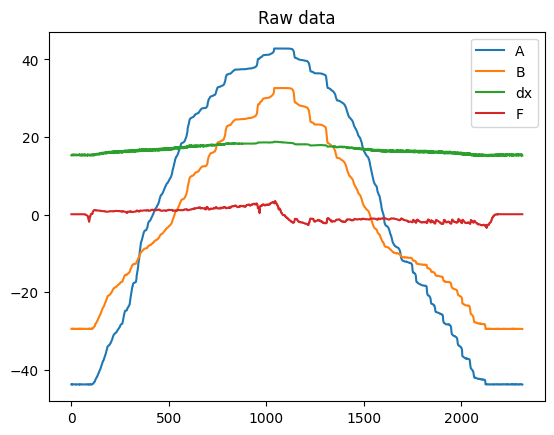

In [52]:
# plot the data
df1.plot()
plt.title("Raw data")
plt.show()

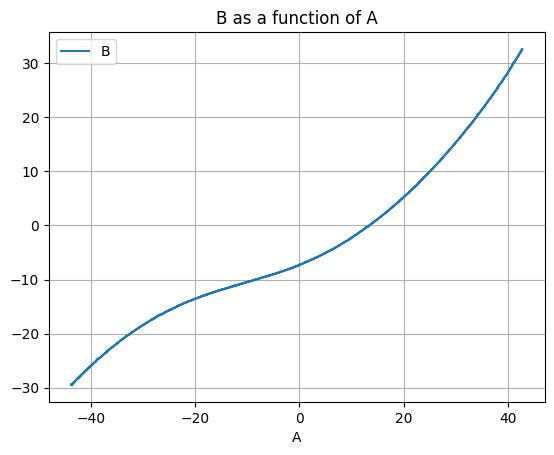

In [53]:
# Plot B as a function of A
df1.plot(x="A", y="B")
plt.title("B as a function of A")
plt.grid()
plt.show()

In [54]:
print(f'df1.size: {df1.size}\ndf1.shape: {df1.shape}')

df1.size: 9260
df1.shape: (2315, 4)

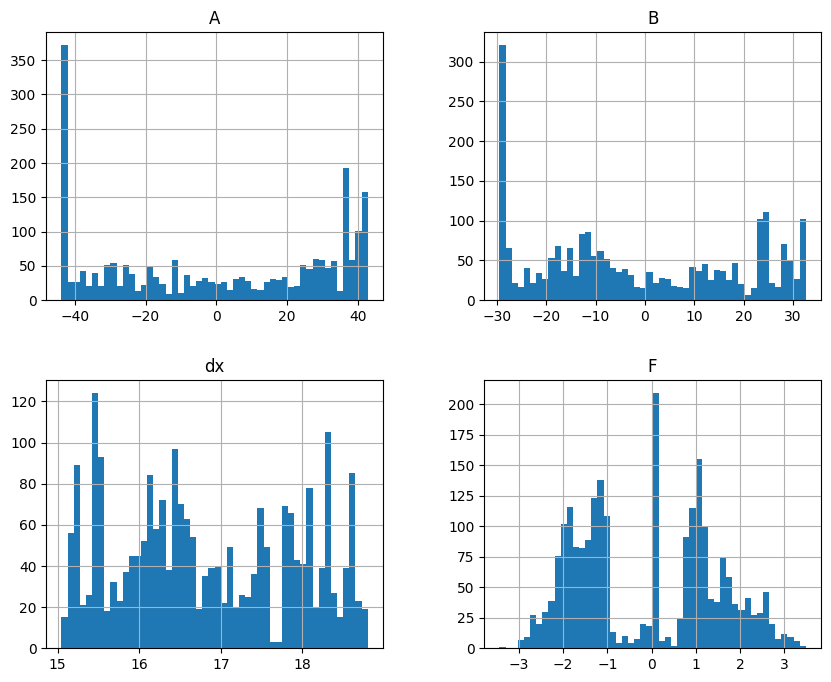

In [55]:
# make histograms of all signals in df1
df1.hist(bins=50, figsize=(10, 8))
plt.show()

In [56]:
# info about the dataset
df1.describe()


,A,B,dx,F
count,2315.000000,2315.000000,2315.000000,2315.000000
mean,0.415329,-1.751655,16.823809,-0.127571
std,31.624628,20.627440,1.084657,1.565469
min,-43.776760,-29.478110,15.045380,-3.443110
25%,-30.899790,-18.950740,15.946725,-1.528495
50%,1.707010,-6.572470,16.622120,0.088520
75%,32.419470,18.141900,17.844260,1.132440
max,42.806650,32.619200,18.799950,3.490420


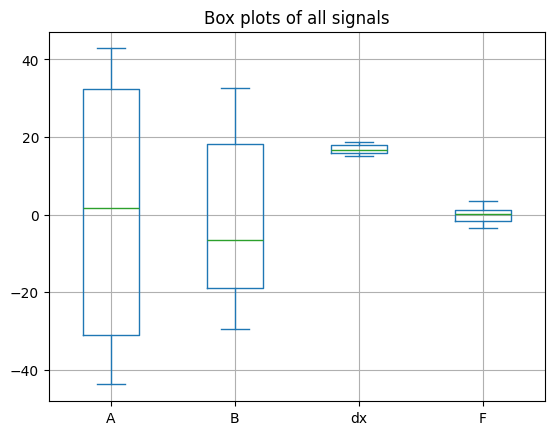

In [57]:
# make box plots of all signals in df1
df1.plot(kind="box")
plt.title("Box plots of all signals")
plt.grid()
plt.show()

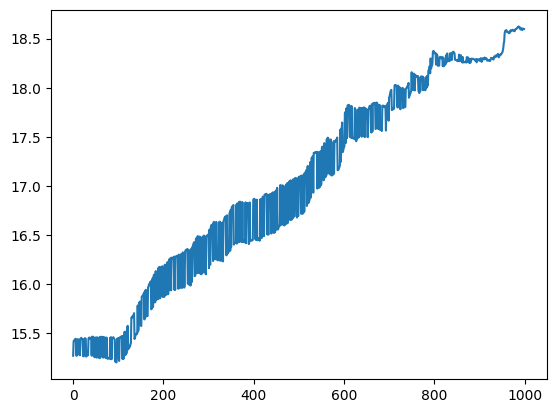

(1000,)

0    15.27346
1    15.41719
2    15.42845
3    15.43485
4    15.42967
Name: dx, dtype: float64

In [58]:
# noisy signal
signal = df1.iloc[0:1000, 2]
signal.plot()

plt.show()

print(signal.shape)
print(signal.head())

## Mean smoothing - Running Mean

In [59]:
srate = 5000 # samples per second
y = signal.copy()  # copy the signal
n = len(y) # number of samples

# initialize filtered signal vector
filtsig = y  # np.zeros(n)  # 3000 zeros

# implement the running mean filter
k = 20  # filter window is actually k*2+1
for i in range(k, n - k):
    # each point is the average of k surrounding points
    filtsig[i] = np.mean(y[i - k : i + k + 1], axis=0)

windowsize_sec = (k * 2 + 1) / srate  # [samples] / [samples/sec] = [sec]
windowsize = 1000 * (k * 2 + 1) / srate  # [ms/sec] * [samples] / [samples/sec] = [ms]

print(f'windowsize = {windowsize} ms')

windowsize = 8.2 ms

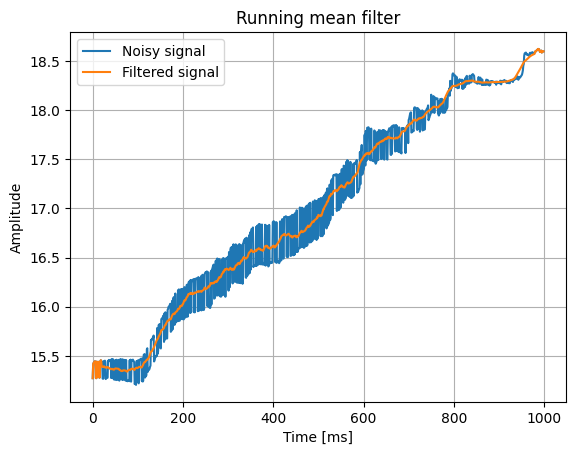

In [60]:
# plot the noisy and filtered signals
signal.plot(label="Noisy signal")
plt.plot(filtsig, label="Filtered signal")
plt.title("Running mean filter")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


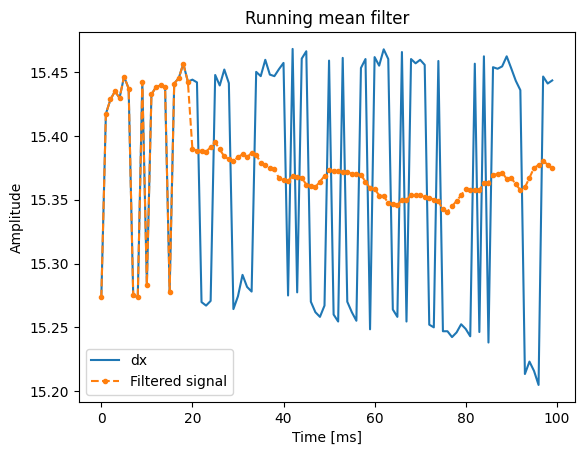

In [73]:
signal[:100].plot()
plt.plot(filtsig[:100], ".--", label="Filtered signal")
plt.title("Running mean filter")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()